#### Lo que hay en cada uno de los archivos de los subhalos que guarde

In [1]:
import h5py
path = '/z/omarioni/gradients/_simulations/snap_127/'
snap = h5py.File(path + 'subhalo_127000000000002.h5py', 'r')
snap.visit(print)

Center
Drk
Drk/Coordinates
Drk/IDs
Drk/Masses
Drk/Potential
Drk/Velocities
Gas
Gas/Coordinates
Gas/IDs
Gas/Masses
Gas/Metallicity
Gas/Potential
Gas/Total_Metallicity
Gas/Velocities
M200
Omega_0
Omega_Baryon
Omega_Lambda
R200
Redshift
Str
Str/Birth_Density
Str/Birth_Position
Str/Birth_Velocities
Str/Coordinates
Str/FormationTime
Str/IDs
Str/Masses
Str/Metallicity
Str/Potential
Str/Total_Metallicity
Str/Velocities
Time
h


#### We check the cosmological parameters

In [2]:
snap = h5py.File(path + 'subhalo_127000000000002.h5py', 'r')
h    = snap['/h'][()]
Om_L = snap['/Omega_Lambda'][()]
Om_M = snap['/Omega_0'][()]

print ('h = ',h)
print ('Omega Lambda = ', Om_L)
print ('Omega Matter = ', Om_M)

h =  0.6777
Omega Lambda =  0.682
Omega Matter =  0.318


#### Acá veo que porcentage de las particulas tienen SFT < 0 (que son celdas de viento de gas o algo asi --> ver docu Illustris)
#### Veo cuantas partículas tienen metalicidades negativas
Dentro de todo son pocas, y los valores negativos son numeros muy chicos, es decir, casi cero

In [31]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/z/omarioni/gradients/_simulations/snap_127/'

for i in range(12):
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%ID[i])+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    met  = snap['/Str/Metallicity'][()]
    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)
    
    part = len(sft)-len(amask)
    print('subhalo ', ID[i])
    print(part, len(sft), part*100/len(sft))
    
    FeH_ = met[amask,8]/met[amask,0] # Fe / H (hierro sobre hidrogeno)
    FeH  = FeH_/0.0127
    
    kk, = np.where(FeH<0)
    kk1, = np.where(met[amask,8]<0)
    kk2, = np.where(met[amask,0]<0)
    print(len(kk), len(FeH), len(kk)*100/len(FeH))
    print(len(kk1),len(kk2))
    print(met[amask,8])
    print(met[amask,8][kk])
    print('-----------')

subhalo  127000000000002.0
58235 5787099 1.0062900254514395
84 5728864 0.001466259279326582
84 0
[0.00373453 0.00132205 0.00230074 ... 0.00155711 0.00132111 0.00120873]
[-9.4427665e-29 -4.0424920e-34 -2.4207493e-28 -1.5639150e-35
 -4.2175689e-28 -7.1099617e-22 -3.3410941e-23 -4.3396221e-24
 -2.8110299e-32 -1.3954716e-34 -1.6060318e-28 -9.2296506e-30
 -4.3872206e-23 -4.9054787e-24 -1.5146352e-38 -1.5834300e-33
 -1.1736304e-27 -1.0735936e-20 -4.0558294e-28 -6.5892221e-35
 -8.7814521e-24 -1.4707498e-34 -1.9250911e-30 -2.0936062e-21
 -1.8751768e-30 -2.0474685e-21 -3.5125942e-25 -9.3543828e-24
 -4.2845347e-30 -1.4379325e-36 -1.7915114e-21 -3.3645319e-38
 -5.0785971e-35 -7.5495064e-15 -1.3490179e-28 -3.3466435e-37
 -3.2061465e-24 -1.9339699e-35 -1.8724207e-30 -1.4235330e-35
 -1.6275488e-22 -1.3539321e-22 -9.5018728e-22 -4.7956146e-09
 -9.0907033e-28 -7.9326705e-20 -5.5820113e-38 -4.9838018e-33
 -5.4509210e-28 -1.8106479e-35 -3.3489882e-22 -3.8729113e-18
 -5.1541800e-34 -6.2827815e-33 -5.6931

#### Plots de distribución de edades y metalicidades

subhalo_127000000000002
rgal =  41.72864099158918


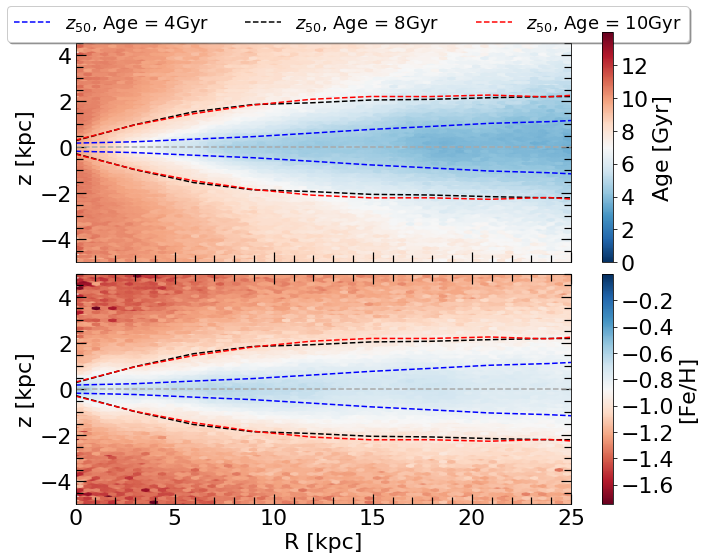

subhalo_127000000000003
rgal =  39.56396635679503


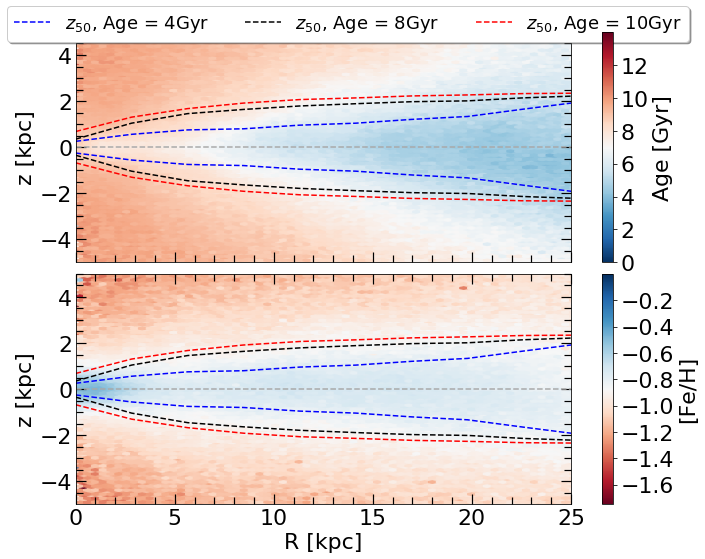

subhalo_127000000000004
rgal =  29.47321823815847


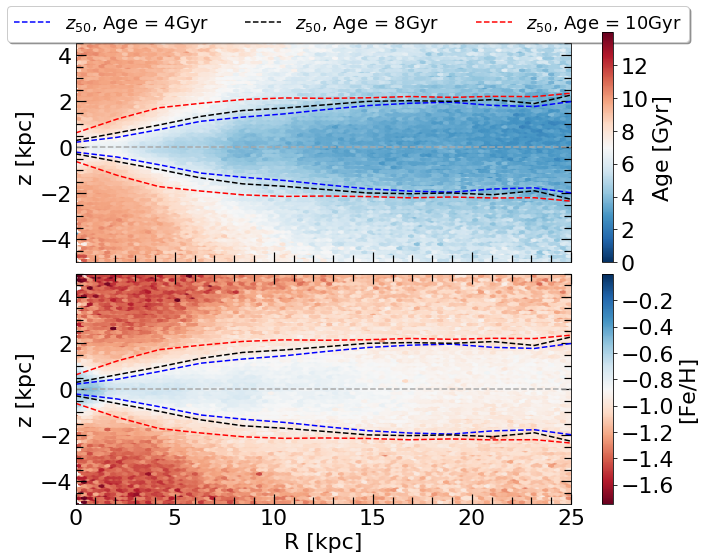

subhalo_127000000000006
rgal =  22.17352810978308


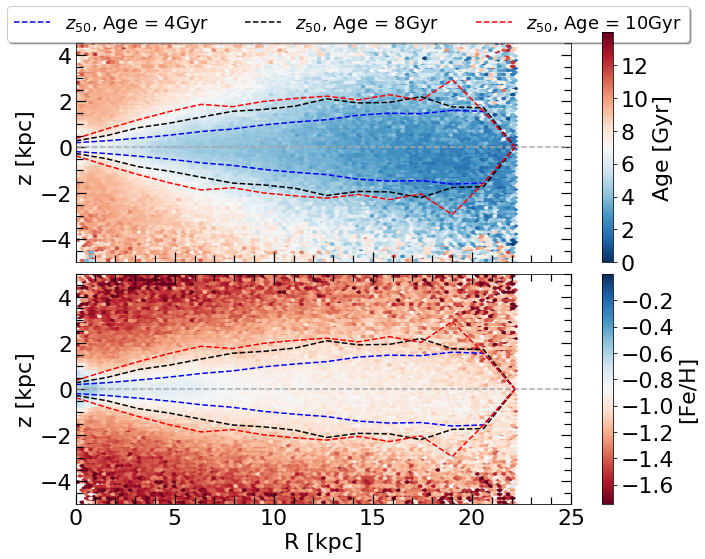

subhalo_127000000000007
rgal =  20.48915449313855


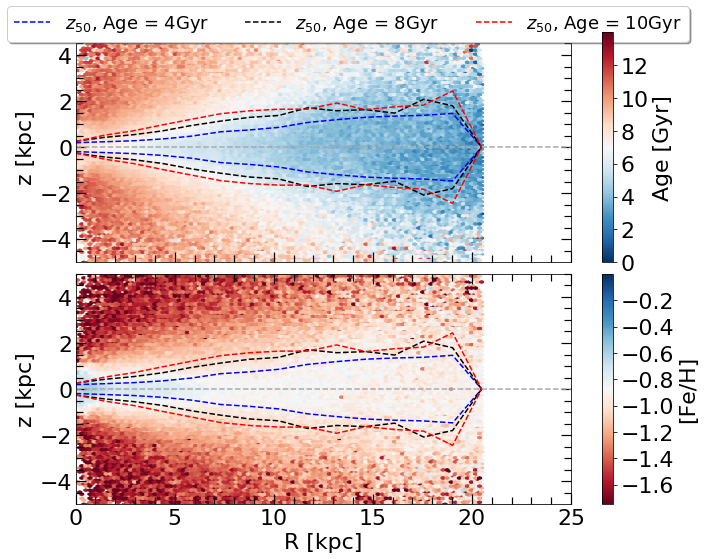

subhalo_127000000000009
rgal =  19.736609119079233


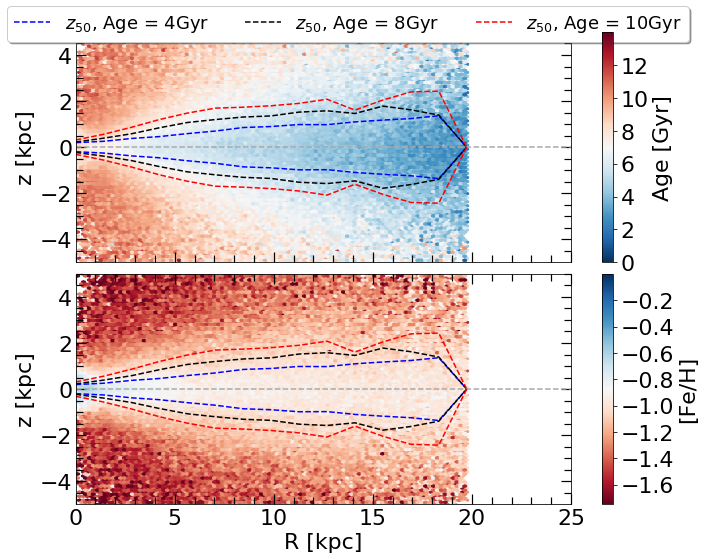

subhalo_127000000000012
rgal =  18.90880920761398


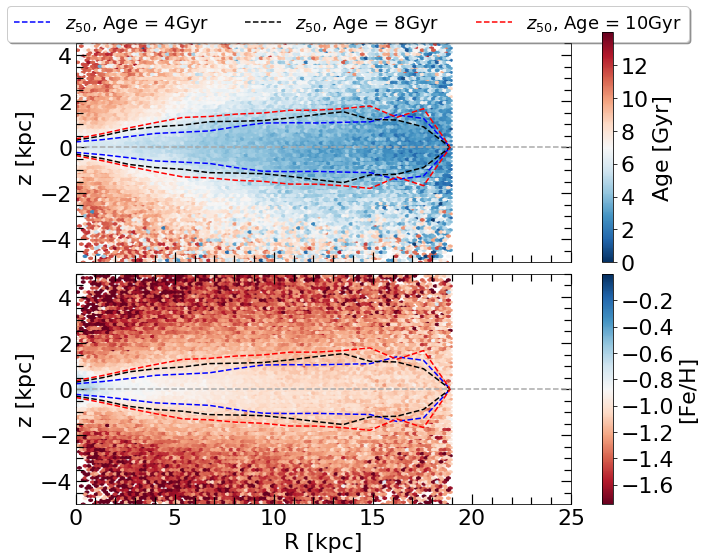

subhalo_127000000000011
rgal =  18.84240814519698


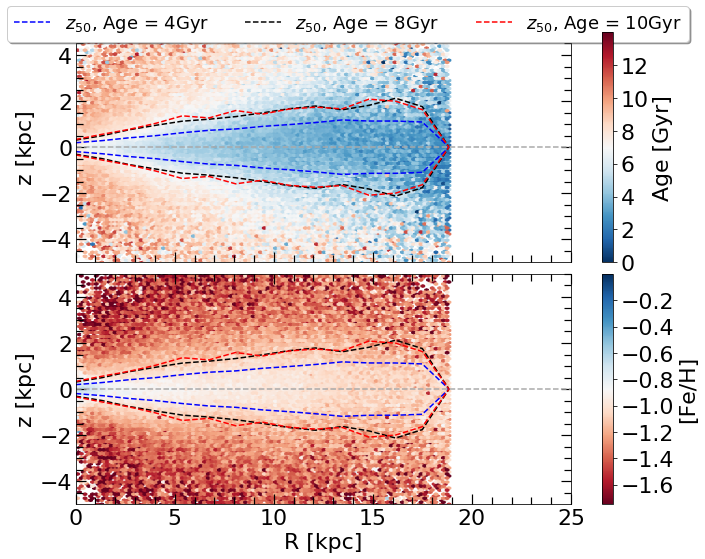

subhalo_127000000000014
rgal =  17.11155378486055


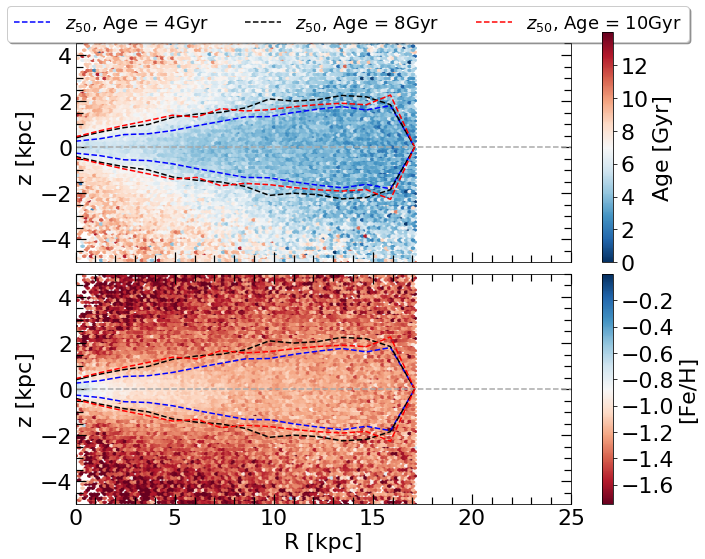

subhalo_127000000000020
rgal =  14.508632138114205


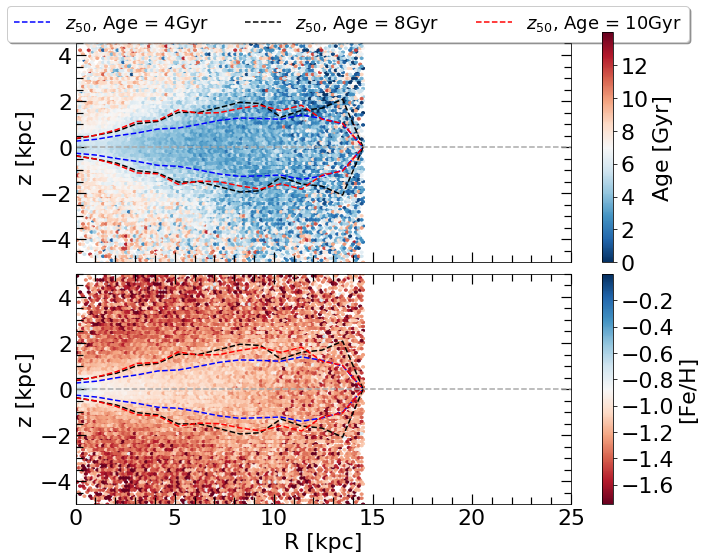

subhalo_127000000000021
rgal =  14.404603806994238


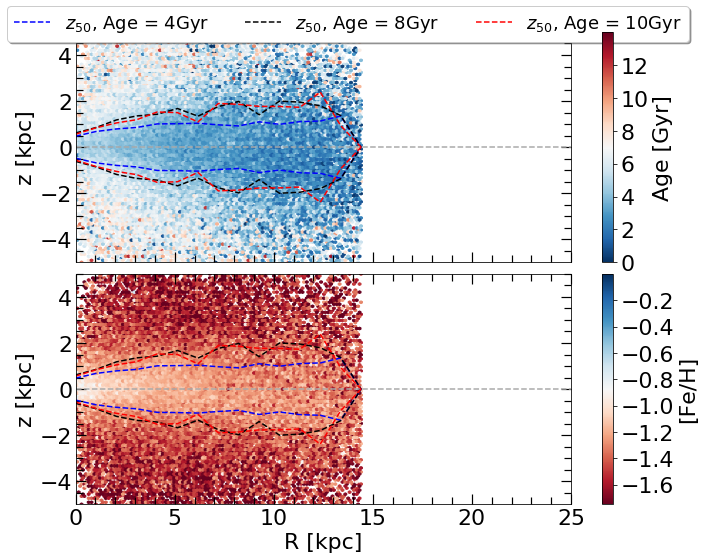

subhalo_127000000000023
rgal =  14.225320938468343


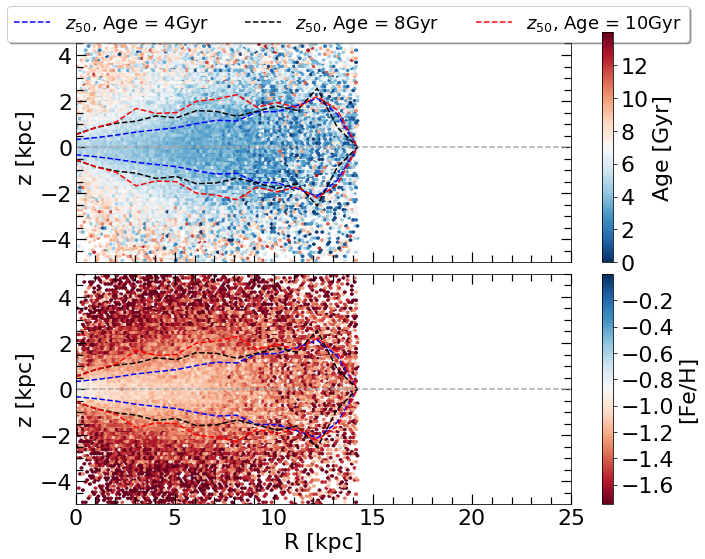

In [32]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/z/omarioni/gradients/_simulations/snap_127/'

for i in range(12):

    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[i])+'.h5py', 'r')

    print('subhalo_'+str('%d'%ID[i]))

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Rvir = snap['/R200'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    met  = snap['/Str/Metallicity'][()]
    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    FeH_ = met[amask,8]/met[amask,0] # Fe / H (hierro sobre hidrogeno)
    FeH  = FeH_/0.0127 #para pasarlo a metalicidad solar (ver Illustris data)

    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h

    rgal = 0.15*Rvir*aexp/h
    print('rgal = ', rgal)

    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr

    Rstr = np.sqrt(xn_str**2 + yn_str**2)

    mask,  = np.where((Rstr <= rgal) & (zn_str <= 5) & (zn_str >-5))
    # mask3, = np.where((Rstr < 50) & (zn_str < 30) & (zn_str > -30))

    nbin = 15
    # med_R,nodo_R = bines.rbin1(Rstr[mask],nbin)
    nodo_R = np.linspace(0,rgal,nbin)
    med_R  = nodo_R

    age_4,  = np.where((age[mask] > 3.5) & (age[mask] < 4.5))
    age_8,  = np.where((age[mask] > 7.5) & (age[mask] < 8.5))
    age_10, = np.where((age[mask] > 9.5) & (age[mask] < 10.5))

    kk,  = np.where(FeH[mask]>0) ##aca saco los FeH negativos para que no explote el log
    Fe_H = np.log10(FeH[mask][kk])

    rr   = Rstr[mask]
    rr4  = rr[age_4]
    rr8  = rr[age_8]
    rr10 = rr[age_10]

    zz  = zn_str[mask]
    z4  = zz[age_4]
    z8  = zz[age_8]
    z10 = zz[age_10]

    mass = mstr[mask]
    M4  = mass[age_4]
    M8  = mass[age_8]
    M10 = mass[age_10]

    z4a  = np.zeros(nbin)
    z8a  = np.zeros(nbin)
    z10a = np.zeros(nbin)

    for j in range(0,nbin-1):
        zetas4,  = np.where((rr4  >= nodo_R[j]) & (rr4  < nodo_R[j+1]) & (z4 > 0))
        zetas8,  = np.where((rr8  >= nodo_R[j]) & (rr8  < nodo_R[j+1]) & (z8 > 0))
        zetas10, = np.where((rr10 >= nodo_R[j]) & (rr10 < nodo_R[j+1]) & (z10 > 0))

        zz4  = np.argsort(z4[zetas4])
        zz8  = np.argsort(z8[zetas8])
        zz10 = np.argsort(z10[zetas10])

        Mbin_4  = np.cumsum(M4[zetas4][zz4])
        Mbin_8  = np.cumsum(M8[zetas8][zz8])
        Mbin_10 = np.cumsum(M10[zetas10][zz10])

        kk4,  = np.where(Mbin_4  < Mbin_4[-1]/2)
        kk8,  = np.where(Mbin_8  < Mbin_8[-1]/2)
        kk10, = np.where(Mbin_10 < Mbin_10[-1]/2)

        zeta4  = z4[zetas4][zz4]
        zeta8  = z8[zetas8][zz8]
        zeta10 = z10[zetas10][zz10]

        z4a[j]  = zeta4[kk4][-1]
        z8a[j]  = zeta8[kk8][-1]
        z10a[j] = zeta10[kk10][-1]


    fig0, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
    fig0.subplots_adjust(bottom=0.10, left =0.10, right = 0.96, top = 0.92,hspace=0.05)

    hb0 =ax[1].hexbin(rr[kk],zz[kk],Fe_H,cmap='RdBu',vmin=-1.75,vmax=0)
    cbar0 = fig0.colorbar(hb0,ax=ax[1])
    cbar0.set_label('[Fe/H]',fontsize=22)
    cbar0.ax.tick_params(labelsize=22)
    cbar0.set_ticks([-1.6,-1.4,-1.2,-1.0,-0.8,-0.6,-0.4,-0.2])
    ax[1].plot(med_R,z4a, ls='--',color='b', label='$z_{50}$, Age = 4Gyr')
    ax[1].plot(med_R,z8a, ls='--',color='k', label='$z_{50}$, Age = 8Gyr')
    ax[1].plot(med_R,z10a,ls='--',color='r', label='$z_{50}$, Age = 10Gyr')
    ax[1].axhline(y=0,ls='--',color='darkgray')
    ax[1].plot(med_R,-z4a,ls='--',color='b')
    ax[1].plot(med_R,-z8a,ls='--',color='k')
    ax[1].plot(med_R,-z10a,ls='--',color='r')
    ax[1].set_ylim(-5,5)
    ax[1].set_xlim(0,25)
    #     ax[0].set_xticklabels([])
    #     ax[0].set_xlabel('R [kpc]',fontsize=20)
    ax[1].minorticks_on()
    ax[1].tick_params( labelsize=22)
    ax[1].tick_params('both', length=7, width=1.2,which='minor', direction='in', right='on',top='on')
    ax[1].tick_params('both', length=10, width=1.2,which='major', direction='in', right='on',top='on')
    #     ax[0,0].set_xlabel('R [kpc]',fontsize=15)
    ax[1].set_ylabel('z [kpc]',fontsize=22)
    ax[1].set_xlabel('R [kpc]',fontsize=22)



    #     fig0.savefig('../_imagenes/metallicity/Rz_met_s'+str('%03d'%j)+'.png',dpi=75, xxbox_inches='tight')


    #     fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    #     fig1.subplots_adjust(bottom=0.10, left =0.08, right = 0.98, top = 0.95,hspace=0.05)
    hb1 =ax[0].hexbin(rr,zz,age[mask],cmap='RdBu_r',vmin=0,vmax=14)
    cbar1 = fig0.colorbar(hb1,ax=ax[0])
    cbar1.set_label('Age [Gyr]',fontsize=22)
    cbar1.ax.tick_params( labelsize=22)
    cbar1.set_ticks([0,2,4,6,8,10,12])
    ax[0].plot(med_R,z4a,ls='--',color='b', label='$z_{50}$, Age = 4Gyr')
    ax[0].plot(med_R,z8a,ls='--',color='k', label='$z_{50}$, Age = 8Gyr')
    ax[0].plot(med_R,z10a,ls='--',color='r', label='$z_{50}$, Age = 10Gyr')
    ax[0].axhline(y=0,ls='--',color='darkgray')
    ax[0].plot(med_R,-z4a,ls='--',color='b')
    ax[0].plot(med_R,-z8a,ls='--',color='k')
    ax[0].plot(med_R,-z10a,ls='--',color='r')
    ax[0].set_ylim(-5,5)
    ax[0].set_xlim(0,25)
    ax[0].minorticks_on()
    ax[0].tick_params( labelsize=22)
    ax[0].tick_params('both', length=7, width=1.2,which='minor', direction='in', right='on',top='on')
    ax[0].tick_params('both', length=10, width=1.2,which='major', direction='in', right='on',top='on')
    ax[0].set_ylabel('z [kpc]',fontsize=22)
    ax[0].legend(fontsize=18,loc='upper center', bbox_to_anchor=(0.55, 1.15),
                 ncol=3, fancybox=True, shadow=True)

    plt.show()
    #     ax[1].legend(fontsize=15,loc='upper center', bbox_to_anchor=(0.5, 1.05),
    #                  ncol=3, fancybox=True, shadow=True)
    fig0.savefig('../_imagenes/metallicity_ages/Rz_met_s'+str('%d'%ID[i])+'.png',dpi=75, xxbox_inches='tight')
    

### Distribucion radial de las metalicidades segun la edad

In [33]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines


ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/z/omarioni/gradients/_simulations/snap_127/'

# for i in range(15):
i = 0    
snap = h5py.File(path + 'subhalo_'+str('%d'%ID[i])+'.h5py', 'r')

print('subhalo_'+str('%d'%ID[i]))

aexp = snap['/Time'][()]
h    = snap['/h'][()]
Om_L = snap['/Omega_Lambda'][()]
Om_M = snap['/Omega_0'][()]

pstr = snap['/Str/Coordinates'][()]
mstr = snap['/Str/Masses'][()]
vstr = snap['/Str/Velocities'][()]

met  = snap['/Str/Metallicity'][()]
sft  = snap['/Str/FormationTime'][()]

amask, = np.where(sft>0) 
ages = time.conv2(sft[amask], h, Om_L, Om_M) 
age  = np.max(ages) - ages 

FeH_ = met[amask,8]/met[amask,0]
FeH  = FeH_/0.0127

xstr = pstr[amask,0]*aexp/h
ystr = pstr[amask,1]*aexp/h
zstr = pstr[amask,2]*aexp/h
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

v_x = vstr[amask,0] *np.sqrt(aexp)
v_y = vstr[amask,1] *np.sqrt(aexp)
v_z = vstr[amask,2] *np.sqrt(aexp)

#----------------------masas----------------------------
mstr = mstr[amask]*1e10/h

rgal = 0.15*Rvir*aexp/h

limit, = np.where(rstr < rgal)
rsort = np.argsort(rstr[limit])
Mc = np.cumsum(mstr[limit][rsort])
Mgal = Mc[-1]
limit50, = np.where(Mc < Mgal/2)
r50 = rstr[limit][rsort][limit50][-1]

veloc,=np.where(rstr < r50/2.)

#----------componentes de la velocidad del centro de masa------------
vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

vx = v_x - vxcm
vy = v_y - vycm
vz = v_z - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

xn_str = e1x*xstr + e1y*ystr + e1z*zstr
yn_str = e2x*xstr + e2y*ystr + e2z*zstr
zn_str = e3x*xstr + e3y*ystr + e3z*zstr

Rstr = np.sqrt(xn_str**2 + yn_str**2)

mask,  = np.where((Rstr <= 30) & (zn_str <= 5) & (zn_str >-5))
# mask3, = np.where((Rstr < 50) & (zn_str < 30) & (zn_str > -30))

nbin = 15
# med_R,nodo_R = bines.rbin1(Rstr[mask],nbin)
nodo_R = np.linspace(0,rgal,nbin)
med_R  = nodo_R

kk,  = np.where(FeH[mask]>0)
Fe_H = np.log10(FeH[mask][kk])

rr   = Rstr[mask]
zz   = zn_str[mask]
mass = mstr[mask]

z50  = np.zeros(nbin)

for j in range(0,nbin-1):
    zetas, = np.where((rr  >= nodo_R[j]) & (rr  < nodo_R[j+1])  & (zz > 0))

    z_sort = np.argsort(zz[zetas])

    Mbin = np.cumsum(mass[zetas][z_sort])

    limit, = np.where(Mbin  < Mbin[-1]/2)

    z50[j]  = zz[zetas][z_sort][limit][-1]


subhalo_127000000000002


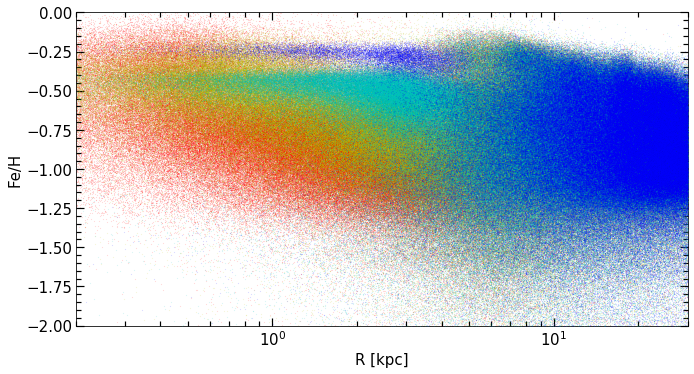

In [34]:
age_cut1, = np.where((age[kk]>3.5) & (age[kk]<4.5))
age_cut2, = np.where((age[kk]>5.5) & (age[kk]<6.5))
age_cut3, = np.where((age[kk]>7.5) & (age[kk]<8.5))
age_cut4, = np.where((age[kk]>9.5) & (age[kk]<10.5))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)
# hb =ax.hexbin(rr[kk],zz[kk],Fe_H,cmap='RdBu',vmin=-1.75,vmax=0)
# cbar = fig.colorbar(hb)
# cbar.set_label('[Fe/H]',fontsize=15)
ax.plot(rr[kk][age_cut1],Fe_H[age_cut1],'.b',markersize=0.1,zorder=4)#c=age[kk][age_cut])
ax.plot(rr[kk][age_cut2],Fe_H[age_cut2],'.c',markersize=0.1,zorder=3)#c=age[kk][age_cut])
ax.plot(rr[kk][age_cut3],Fe_H[age_cut3],'.y',markersize=0.1,zorder=2)#c=age[kk][age_cut])
ax.plot(rr[kk][age_cut4],Fe_H[age_cut4],'.r',markersize=0.1,zorder=1)#c=age[kk][age_cut])
ax.set_ylim(-2,0)
ax.set_xlim(0.2,30)
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
ax.set_xlabel('R [kpc]',fontsize=15)
ax.set_ylabel('Fe/H',fontsize=15)

plt.show()

### Histogramas de metalicidades y edades

(-5, 0)

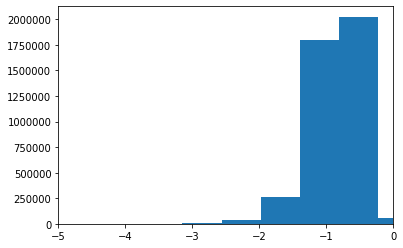

In [13]:
plt.hist(Fe_H,bins=60)
plt.xlim(-5,0)

(array([302511., 366386., 513429., 740359., 967682., 894873., 849195.,
        686389., 383772., 102469.]),
 array([ 0.       ,  1.3521405,  2.704281 ,  4.0564218,  5.408562 ,
         6.7607026,  8.1128435,  9.464984 , 10.817124 , 12.169265 ,
        13.521405 ], dtype=float32),
 <a list of 10 Patch objects>)

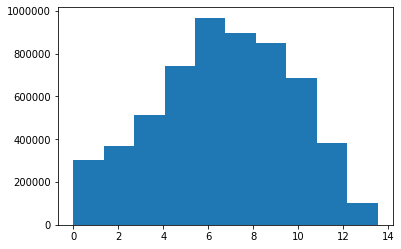

In [14]:
plt.hist(age)

## Controlo que los tiempos que calculo esten bien comparando con astropy

In [32]:
%%time
import numpy as np
from astropy.cosmology import Planck13  # Planck 2013
a = np.linspace(1e-3,1,30)
z = 1./a -1
aa = Planck13.age(z)
print(aa)


[4.31516682e-04 1.14384341e-01 3.18261049e-01 5.81341617e-01
 8.92095553e-01 1.24354641e+00 1.63064642e+00 2.04931976e+00
 2.49601931e+00 2.96749652e+00 3.46067790e+00 3.97260249e+00
 4.50039692e+00 5.04127471e+00 5.59255032e+00 6.15166115e+00
 6.71619219e+00 7.28389925e+00 7.85272787e+00 8.42082643e+00
 8.98655262e+00 9.54847356e+00 1.01053602e+01 1.06561773e+01
 1.12000695e+01 1.17363461e+01 1.22644640e+01 1.27840104e+01
 1.32946864e+01 1.37962908e+01] Gyr
CPU times: user 19.6 ms, sys: 3.05 ms, total: 22.7 ms
Wall time: 22.3 ms


In [33]:
%%time
import time_conversion as time
ab = time.conv2(a,h, Om_L, Om_M)
print(ab)

[5.39399901e-04 1.13840455e-01 3.15167548e-01 5.74699802e-01
 8.81147309e-01 1.22767796e+00 1.60935610e+00 2.02220634e+00
 2.46277859e+00 2.92792105e+00 3.41465726e+00 3.92012237e+00
 4.44153611e+00 4.97619942e+00 5.52150598e+00 6.07496188e+00
 6.63420862e+00 7.19704536e+00 7.76144779e+00 8.32558173e+00
 8.88781080e+00 9.44669805e+00 1.00010021e+01 1.05496690e+01
 1.10918199e+01 1.16267377e+01 1.21538505e+01 1.26727167e+01
 1.31830080e+01 1.36844953e+01]
CPU times: user 551 µs, sys: 962 µs, total: 1.51 ms
Wall time: 1.37 ms


In [34]:
%%time
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=67.77 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=Om_M)
z = 1./a -1
ac = cosmo.age(z)
print (ac)

[4.26794839e-04 1.12617660e-01 3.13387456e-01 5.72488641e-01
 8.78571904e-01 1.22478221e+00 1.60617247e+00 2.01876085e+00
 2.45909332e+00 2.92401563e+00 3.41054967e+00 3.91582947e+00
 4.43707391e+00 4.97158325e+00 5.51675054e+00 6.07008123e+00
 6.62921612e+00 7.19195368e+00 7.75626880e+00 8.32032648e+00
 8.88248949e+00 9.44132003e+00 9.99557590e+00 1.05442022e+01
 1.10863195e+01 1.16212098e+01 1.21483006e+01 1.26671495e+01
 1.31774279e+01 1.36789060e+01] Gyr
CPU times: user 16.7 ms, sys: 3.73 ms, total: 20.5 ms
Wall time: 18.9 ms


In [40]:
x = np.asarray(aa)
y = np.asarray(ab)
z = np.asarray(ac)

In [25]:
x-y

array([-1.07883220e-04,  5.43885908e-04,  3.09350080e-03,  6.64181465e-03,
        1.09482439e-02,  1.58684541e-02,  2.12903194e-02,  2.71134121e-02,
        3.32407220e-02,  3.95754717e-02,  4.60206390e-02,  5.24801108e-02,
        5.88608109e-02,  6.50752896e-02,  7.10443381e-02,  7.66992664e-02,
        8.19835776e-02,  8.68538911e-02,  9.12800802e-02,  9.52446962e-02,
        9.87418197e-02,  1.01775519e-01,  1.04358095e-01,  1.06508285e-01,
        1.08249537e-01,  1.09608460e-01,  1.10613486e-01,  1.11293774e-01,
        1.11678346e-01,  1.11795432e-01])

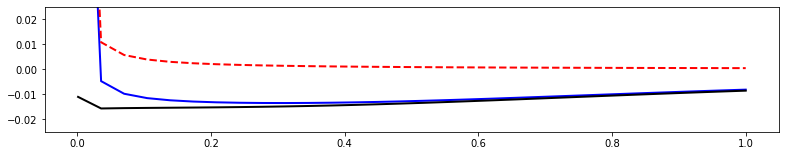

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 2))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)
r1 =(y-x)/y
r2 =(z-x)/z
r3 =(y-z)/y
ax.plot(a,r1,'-b',lw=2)
ax.plot(a,r2,'-k',lw=2)
ax.plot(a,r3,'--r',lw=2)
ax.set_ylim(-0.025,0.025)
plt.show()

### Vemos que los tiempos son todos iguales. De hecho el ac y el ab son iguales

(0, 14)

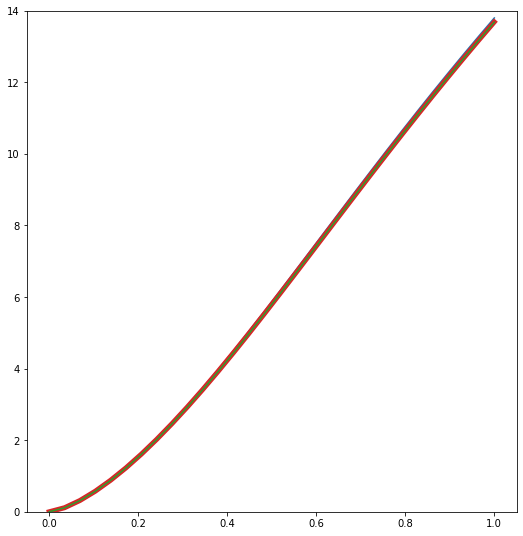

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(a,x, 'tab:blue',lw=1.5)
ax.plot(a,y, 'tab:red',lw=5)
ax.plot(a,z, 'tab:green',lw=1.5)

ax.set_ylim(0,14)